# HW2 - Reproduction

Reproduce data visualization as close to the original as you can.

You can use whatever tool you want.

Important: I don't have to run your homework locally. You can submit:

- Repo with your code and image

- Notebook (Colab, RPubs, Observable, Codepen etc.)

--

Styles used:

- Background - #F3F7F7
- Title - #3A3F4A, 36px
- Caption - #5D646F, 12px
- Axis text - #5D646F, 12 px
- Legend title & text - #5D646F, 12 px
- Font Family - Ubuntu Mono
- Color scale #67001f, #f7f7f7, #053061

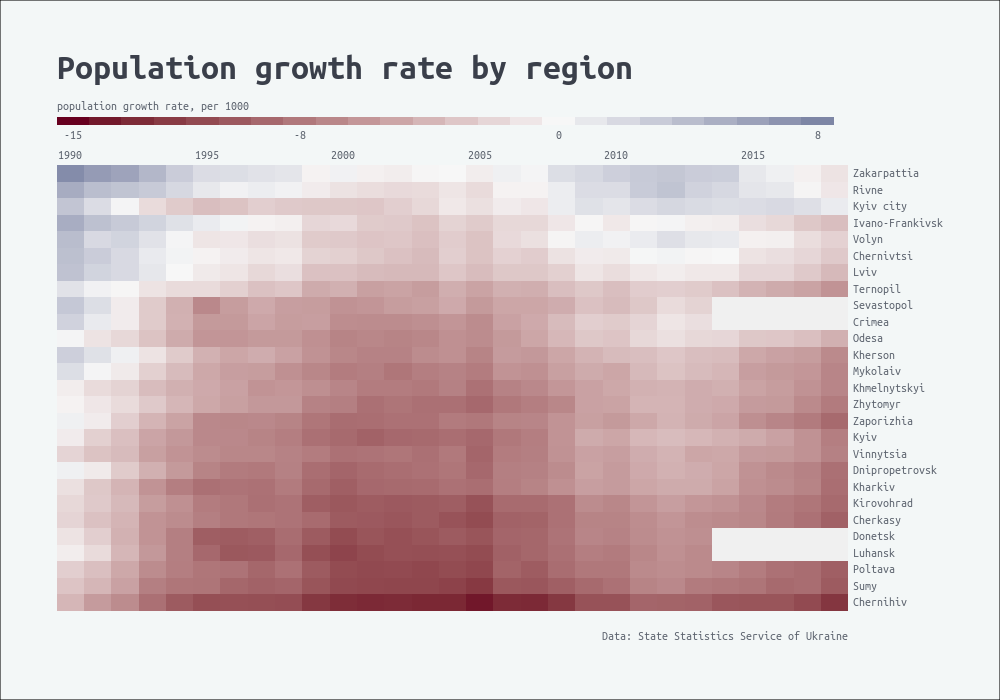

In [285]:
import pandas as pd
import numpy as np
import altair as alt
import vega
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [286]:
df = pd.read_csv("rate.csv")
df.head(3)

,region,year,rate
0,Crimea,1990,2.5
1,Vinnytsia,1990,-2.1
2,Volyn,1990,4.0


In [287]:
bg_color = '#F3F7F7'
titlecolor = '#3A3F4A'
titlesize = 36
textcolor = '#5D646F'
textsize = 12
domain = (int(np.floor(df.rate.min())), 0, int(np.ceil(df.rate.max())))
color_scale = ('#67001f', '#f7f7f7', '#053061')
font = 'Ubuntu Mono'
figsize = (440, 775)
opacity = .7

domain

(-15, 0, 8)

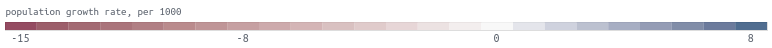

In [341]:
legend = pd.DataFrame({'rate':range(-15,9)})

xaxis = alt.Axis(values = [-15, -8, 0, 8],
                 title='population growth rate, per 1000',
                 titleFontWeight='lighter',
                 titleFont=font,
                 titleAnchor='start',
                 titleY=-25,
                 titleColor=textcolor,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
#                  labelPadding= -figsize[0]-15,
                 labelAlign='center'
                 )

chart2 = alt.Chart(legend)
chart2 = chart2.mark_rect(opacity=opacity)
chart2 = chart2.encode(
    x = alt.X('rate:N', axis=xaxis),
    color = alt.Color('rate:Q', legend=None,
        scale=alt.Scale(domain=domain, range=color_scale)
    )
).properties(
    height=8, width=figsize[1]-figsize[1] // (29*2), title=''
)

chart2

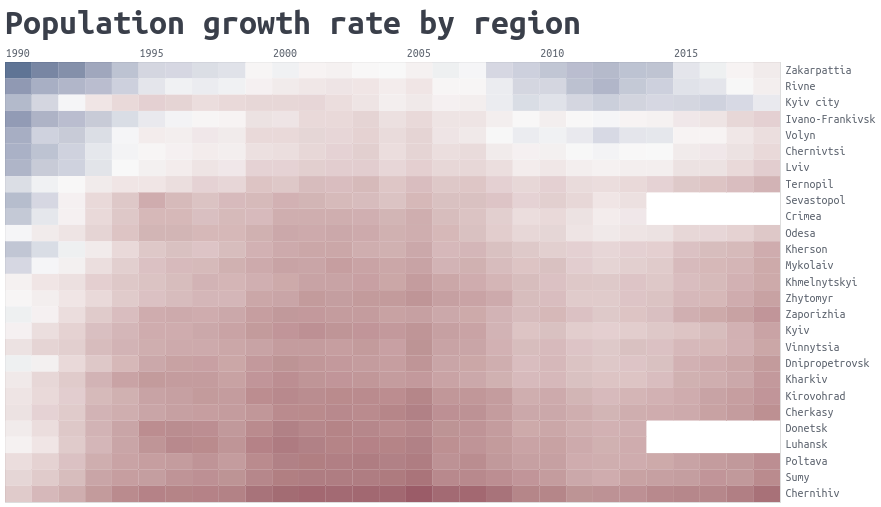

In [313]:
xaxis = alt.Axis(values = tuple(range(1990,2016,5)),
                 title=None,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelPadding= -figsize[0]-15,
                 labelAlign='center'
                 )

yaxis = alt.Axis(
                 title=None,
                 grid=False, 
                 domain=False, 
                 ticks=False,
                 labelAngle = 0,
                 labelColor = textcolor,
                 labelFontSize = textsize,
                 labelFont = font,
                 labelPadding = -1*figsize[1]-5,
                 labelAlign = 'left'
                 )

chart1 = alt.Chart(df)
chart1 = chart1.mark_rect(opacity=opacity)
chart1 = chart1.encode(
    x = alt.X('year:O', axis=xaxis),
    y = alt.Y('region:O', axis=yaxis, sort=alt.Sort(field='rate', op='mean', order='descending')),
    color = alt.Color('rate',
        scale=alt.Scale(domain=domain, range=color_scale),
        legend=None
    )
).properties(
    height=figsize[0], width=figsize[1]
)

chart1_ = chart1.configure_title(
    color=titlecolor,
    font=font,
    fontSize=titlesize,
    anchor='start'
)
chart1_.title = 'Population growth rate by region'



chart1_

In [338]:
annotation = alt.Chart(
    dict(values= dict(text=" "*80+"Data : State Statistics Service of Ukraine"))
)

annotation = annotation.mark_text(size=textsize, 
            color=textcolor, 
            font=font,
            align='left',
            )
annotation = annotation.encode(
    text="text:N"
)

annotation.configure_view(
    stroke=None
)

Reproduction:


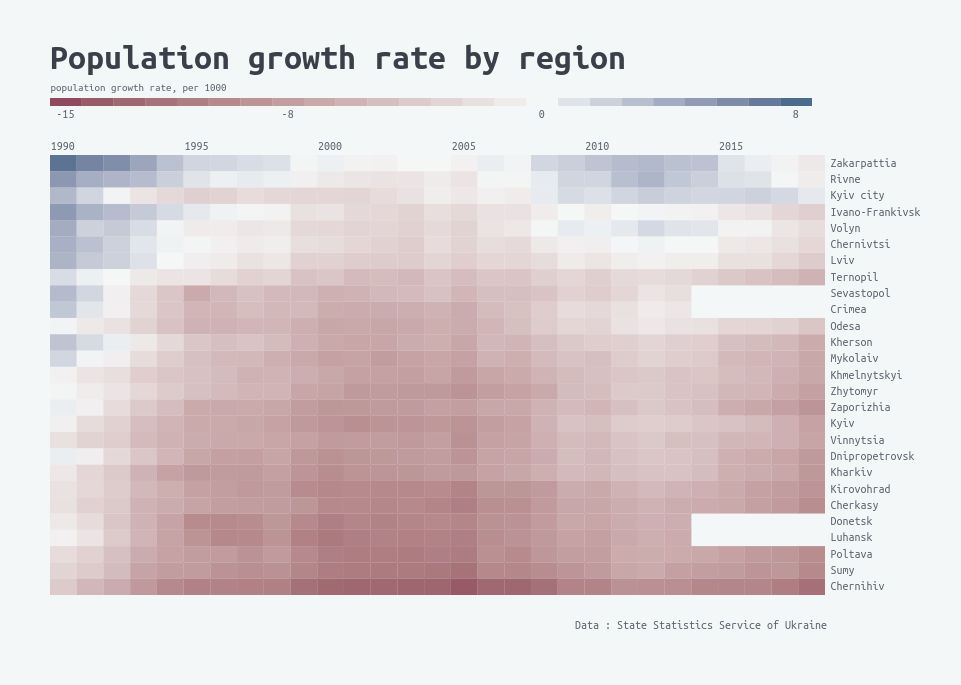

In [342]:
chart = alt.vconcat(chart2, chart1, annotation).configure_title(
    color=titlecolor,
    font=font,
    fontSize=titlesize,
    anchor='start'
).properties(
    padding={'left': 50, 'top': 40, 'right': 40, 'bottom': 50},
    title=alt.TitleParams('Ukraine Population Prospects',dx=90),
    background=bg_color
).configure_view(
    stroke=None
)

chart.title = 'Population growth rate by region'
print('Reproduction:')
chart

Original:
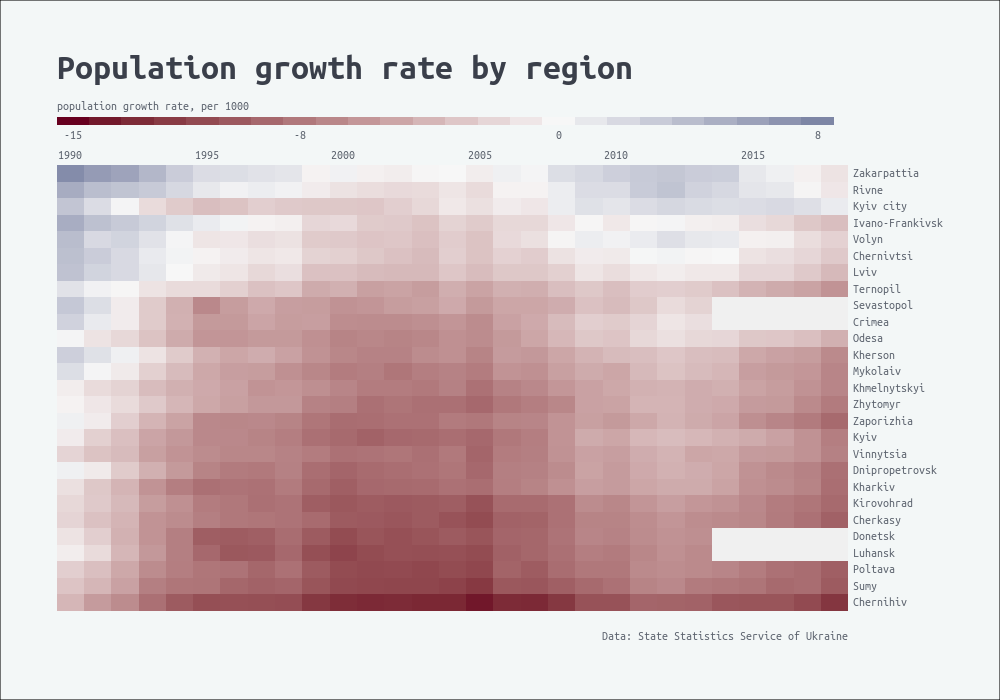